In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [108]:
import nltk
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [109]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## EDA

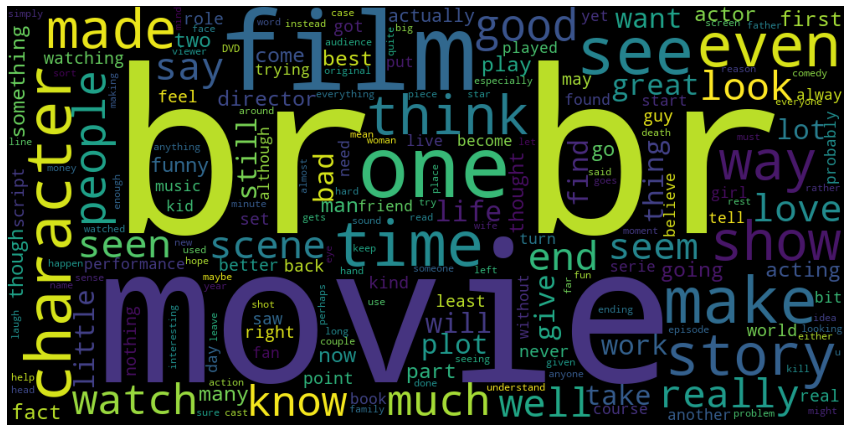

In [111]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# convert list to string and generate
unique_string = (" ").join(df["review"])
wc = WordCloud(width=1000, height=500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [112]:
df["sentiment"].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

## Cleaning

In [113]:
# removing <br /> HTML tag

df["review_clean"] = df["review"]

df['review_clean'].replace('https?://\S+|www\.\S+'," ",regex=True,inplace=True)
df['review_clean'].replace('<.*?>'," ",regex=True,inplace=True)
df['review_clean'].replace('@\w+'," ",regex=True,inplace=True)
df['review_clean'].replace('#\w+'," ",regex=True,inplace=True)
df['review_clean'].replace("[^\w\s\d]"," ",regex=True,inplace=True)
df['review_clean'].replace(r'( +)'," ",regex=True,inplace=True)
df['review_clean'].replace("[^a-zA-Z]"," ",regex=True,inplace=True)

print(df.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        review_clean  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production The filming tech...  
2  I thought this was a wonderful way to spend ti...  
3  Basically there s a family where a little boy ...  
4  Petter Mattei s Love in the Time of Money is a...  


In [114]:
df.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...


In [115]:
# removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

active = []
for sentence in df["review_clean"]:
    cleaned = []
    for word in sentence.split(" "):
        if word not in stop_words:
            cleaned.append(word.lower())
    active.append(" ".join(cleaned))
df["review_clean"] = active

df.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


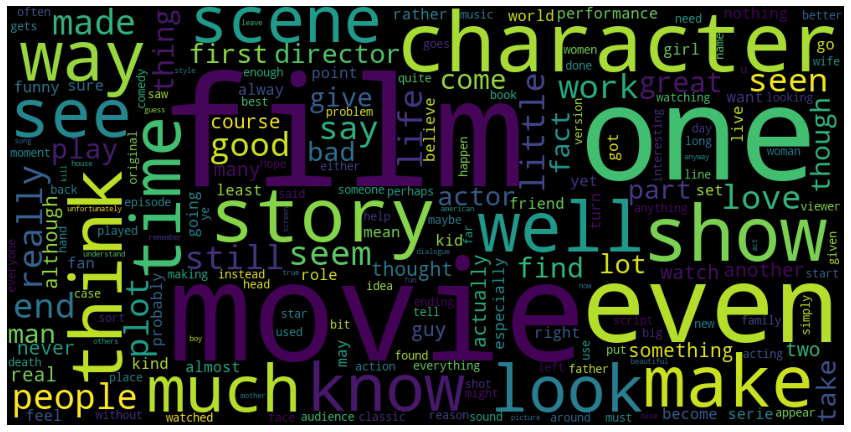

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# convert list to string and generate
unique_string = (" ").join(df["review_clean"])
wc = WordCloud(width=1000, height=500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud_clean"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Split Dataset

In [117]:
from sklearn.model_selection import train_test_split

X = df["review_clean"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Word to Vector

In [118]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(ngram_range=(1,3))
# cv.fit(X)

# X_train = cv.transform(X_train)
# X_test = cv.transform(X_test)

In [119]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Baseline Training

In [120]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

In [121]:
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

In [122]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

In [123]:
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

In [124]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

In [125]:
# from lightgbm import LGBMClassifier

# lgbm = LGBMClassifier()
# lgbm.fit(X_train, y_train)
# y_pred = lgbm.predict(X_test)

# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_pred, y_test))

## NN

In [126]:
print('longest seq TRAIN:',len(max(X_train,key=len)))
print('longest seq TEST:',len(max(X_test,key=len)))

longest seq TRAIN: 8786
longest seq TEST: 9442


In [127]:
# from sklearn.model_selection import train_test_split

# X = df["review_clean"]
# X_train, X_test = train_test_split(X, test_size=0.3)

In [128]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=90000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [129]:
print('longest seq TRAIN:',len(max(X_train,key=len)))
print('longest seq TEST:',len(max(X_test,key=len)))

longest seq TRAIN: 1210
longest seq TEST: 1488


In [130]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1500

X_train = pad_sequences(X_train, padding="post", maxlen=maxlen, truncating="post")
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen, truncating="post")

In [131]:
print('longest seq TRAIN:',len(max(X_train,key=len)))
print('longest seq TEST:',len(max(X_test,key=len)))

longest seq TRAIN: 1500
longest seq TEST: 1500


In [132]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 1500), (35000,), (15000, 1500), (15000,))

In [133]:
X_train[0]

array([  51,  940, 1096, ...,    0,    0,    0], dtype=int32)

In [134]:
y_train

array([1, 1, 0, ..., 0, 1, 1])

In [135]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D, LSTM, Dropout

embedding_dim = 200

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
# model.add(Dropout(0.2))
# model.add(LSTM(64))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1500, 200)         19855800  
_________________________________________________________________
lstm (LSTM)                  (None, 1500, 64)          67840     
_________________________________________________________________
flatten (Flatten)            (None, 96000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                960010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 20,883,661
Trainable params: 20,883,661
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(X_train, y_train, epochs=5, verbose=True,
                    validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
547/547 [==============================] - 221s 401ms/step - loss: 0.4242 - accuracy: 0.7844 - val_loss: 0.2636 - val_accuracy: 0.8951
Epoch 2/5
547/547 [==============================] - 218s 398ms/step - loss: 0.1117 - accuracy: 0.9594 - val_loss: 0.3203 - val_accuracy: 0.8871
Epoch 3/5
547/547 [==============================] - 217s 397ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.4904 - val_accuracy: 0.8780
Epoch 4/5
547/547 [==============================] - 218s 399ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.5931 - val_accuracy: 0.8759
Epoch 5/5
547/547 [==============================] - 219s 400ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.6868 - val_accuracy: 0.8785


In [137]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D, LSTM, Dropout

embedding_dim = 200

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(32, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 200)         19855800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 300000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                9600032   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 29,455,865
Trainable params: 29,455,865
Non-trainable params: 0
_________________________________________________________________


In [138]:
history2 = model2.fit(X_train, y_train, epochs=5, verbose=True,
                    validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
547/547 [==============================] - 183s 334ms/step - loss: 0.6454 - accuracy: 0.6963 - val_loss: 0.2619 - val_accuracy: 0.8950
Epoch 2/5
547/547 [==============================] - 183s 335ms/step - loss: 0.1201 - accuracy: 0.9606 - val_loss: 0.2833 - val_accuracy: 0.8873
Epoch 3/5
547/547 [==============================] - 184s 336ms/step - loss: 0.0197 - accuracy: 0.9978 - val_loss: 0.3357 - val_accuracy: 0.8895
Epoch 4/5
547/547 [==============================] - 184s 336ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.3703 - val_accuracy: 0.8903
Epoch 5/5
547/547 [==============================] - 183s 335ms/step - loss: 8.8225e-04 - accuracy: 1.0000 - val_loss: 0.4016 - val_accuracy: 0.8895


In [139]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D, LSTM, Dropout, Conv1D, MaxPooling1D

embedding_dim = 200

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1500, 200)         19855800  
_________________________________________________________________
conv1d (Conv1D)              (None, 1500, 32)          19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 750, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                768032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 20,643,097
Trainable params: 20,643,097
Non-trainable params: 0
__________________________________________

In [140]:
history3 = model3.fit(X_train, y_train, epochs=5, verbose=True,
                    validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
547/547 [==============================] - 187s 337ms/step - loss: 0.4952 - accuracy: 0.7096 - val_loss: 0.2538 - val_accuracy: 0.8990
Epoch 2/5
547/547 [==============================] - 183s 334ms/step - loss: 0.1176 - accuracy: 0.9605 - val_loss: 0.2864 - val_accuracy: 0.8913
Epoch 3/5
547/547 [==============================] - 183s 334ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.4363 - val_accuracy: 0.8844
Epoch 4/5
547/547 [==============================] - 184s 336ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.6206 - val_accuracy: 0.8829
Epoch 5/5
547/547 [==============================] - 182s 332ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.7039 - val_accuracy: 0.8855


In [141]:
# from keras.backend import clear_session

# clear_session()

In [143]:
model.save("model.h5")
model2.save("model2.h5")
model3.save("model3.h5")

In [144]:
y_pred = model2.predict(X_test, verbose=0)
print(y_pred)
# y_pred = list(le.inverse_transform(y_pred))
# print(y_pred)

[[1.4212775e-06]
 [4.5057354e-06]
 [9.8388886e-01]
 ...
 [9.9873835e-01]
 [2.2205686e-06]
 [1.9578496e-03]]


In [145]:
new_pred = []
for pred in y_pred:
    if pred >= 0.75:
        new_pred.append("positive")
    else:
        new_pred.append("negative")
print(new_pred)

['negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'ne

In [147]:
result_df = pd.DataFrame()
# result_df["text"] = X_test
result_df["sentiment"] = new_pred
result_df.to_csv("result.csv")